In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

In [ ]:
import os
import cv2
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

In [ ]:
data_path='/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data'
gt_path='/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth'   # here we are performing pixel wise segmentation  , ie white regions are class1 and black regios are class 0. Therefore it can be considered as a classification problem

In [ ]:
X = []
Y = []
for file in os.scandir(data_path):
    gt_im_path=os.path.join(gt_path, "imgy"+file.name.split('x')[1]) #splitting the name with x , Train images ./dataset/data/imgx23.jpg, Test Images ./dataset/groundtruth/imgy23.jpg
    print(file.path,gt_im_path)
    im = cv2.imread(file.path)
    im = cv2.resize(im,(248,248))/255
    gt = cv2.imread(gt_im_path)
    gt = cv2.resize(gt,(248,248))/255
    X.append(im)
    Y.append(gt)
    
X = np.array(X).reshape((-1,248,248,3)) 
Y = np.array(Y).reshape((-1,248,248,3))

print(X.shape)
print(Y.shape)

/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx7.jpg /content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth/imgy7.jpg
/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx11.jpg /content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth/imgy11.jpg
/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx4.jpg /content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth/imgy4.jpg
/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx29.jpg /content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth/imgy29.jpg
/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx21.jpg /content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/groundtruth/imgy21.jpg
/content/drive/MyDrive/Lecture/LAB/DAY 2/Semantic Segmentation/dataset/data/imgx46.jpg /content/dri

In [ ]:
batch_size = 64
epochs = 120
inChannel = 3
x, y = 248, 248
input_img = Input(shape = (x, y, inChannel))
conv1 = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img) 
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) 
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) 
conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2) 

#decoder
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3) 
up1 = UpSampling2D((2,2))(conv4) 
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) 

up2 = UpSampling2D((2,2))(conv5) 
conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
add_res=add([conv6,conv1])
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(add_res) 


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 248, 248, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 248, 248, 12  3584        ['input_4[0][0]']                
                                8)                                                                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 124, 124, 12  0          ['conv2d_21[0][0]']              
                                8)                                                            

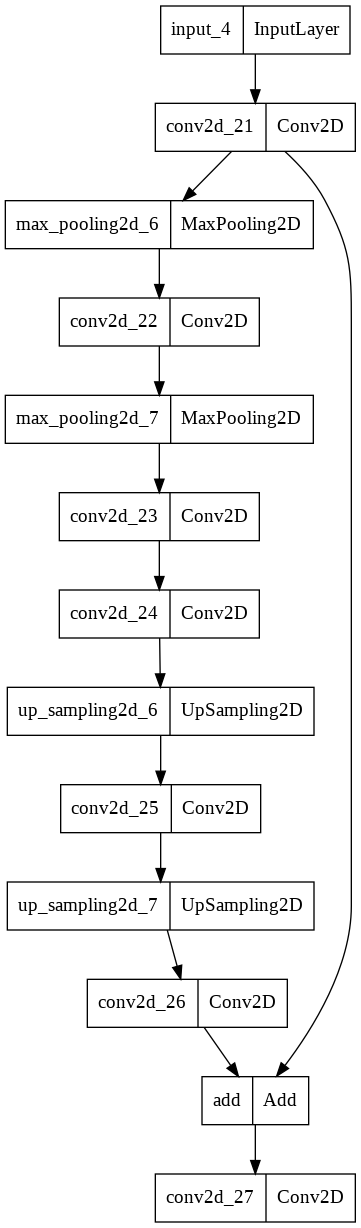

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()
tf.keras.utils.plot_model(autoencoder)

In [ ]:
autoencoder_train = autoencoder.fit(X, Y, batch_size=batch_size,epochs=epochs,verbose=1)

In [ ]:
from matplotlib import pyplot as plt
image=autoencoder.predict(X[2:5])
for i in range(3):
    plt.figure(figsize=[5, 5])
    curr_img = np.reshape(image[i], (248,248))
    plt.imshow(curr_img,cmap='gray')
    plt.show()

In [ ]:
im = cv2.imread('dataset/imgx61.jpg')
img = cv2.resize(im,(248,248))/255
img=img.reshape(-1,248,248,3)
plt.imshow(img[0])
plt.show()
out=autoencoder.predict(img)
out = np.reshape(out[0], (248,248))


plt.imshow(out,cmap='gray')
plt.show()



In [ ]:
import numpy as np

k=1

# segmentation
seg = np.zeros((100,100), dtype='int')
seg[30:70, 30:70] = k

# ground truth
gt = np.zeros((100






,100), dtype='int')
gt[30:70, 40:80] = k

dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))

print('Dice similarity score is {}'.format(dice))